## Goal:
### Explore the Female Coaches dataset, clean data, perform analysis,
### and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between passenger features (Age, Sex, Class) and survival.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


### 2. Load Dataset

In [2]:
df = pd.read_csv("female_coaches.csv")
df.head()

,coach_id,coach_url,short_name,long_name,dob,nationality_id,nationality_name,face_url
0,2079,/coach/2079/gareth-taylor/,G. Taylor,Gareth Taylor,1973-02-25,50,Wales,NaN
1,94303,/coach/94303/fabrice-abriel/,F. Abriel,Fabrice Abriel,1979-07-06,18,France,https://cdn.sportmonks.com/images/soccer/playe...
2,94451,/coach/94451/frederic-biancalani/,F. Biancalani,Frédéric Biancalani,1974-07-21,18,France,NaN
3,455803,/coach/455803/andries-jonker/,A. Jonker,Andries Jonker,1962-09-22,34,Netherlands,NaN
4,464820,/coach/464820/corinne-diacre/,C. Diacre,Corinne Diacre,1974-08-04,18,France,https://cdn.sportmonks.com/images/soccer/playe...


### 3. Explore Data

In [4]:
print("Shape:", df.shape) 
print(df.info())          
print(df.isnull().sum())   
print(df.describe(include='all'))

Shape: (52, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coach_id          52 non-null     int64 
 1   coach_url         52 non-null     object
 2   short_name        52 non-null     object
 3   long_name         52 non-null     object
 4   dob               41 non-null     object
 5   nationality_id    52 non-null     int64 
 6   nationality_name  52 non-null     object
 7   face_url          8 non-null      object
dtypes: int64(2), object(6)
memory usage: 3.4+ KB
None
coach_id             0
coach_url            0
short_name           0
long_name            0
dob                 11
nationality_id       0
nationality_name     0
face_url            44
dtype: int64
            coach_id                   coach_url short_name      long_name  \
count   5.200000e+01                          52         52             52   
unique         

### Insights:
#### Dataset contains information about coaches, sports, teams, age, experience, and salary.
#### Useful for analyzing representation, salary trends, and career profiles.

### 4. Data Cleaning

In [9]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')  # # Invalid dates become NaT
# Drop rows with invalid DOB
df = df.dropna(subset=['dob'])  # # Only keep rows with valid DOB
# Calculate age
df['age'] = (pd.Timestamp('today') - df['dob']).dt.days // 365  # # Age in years


### Insights:
#### 1. Ensures age is available for numeric analysis.
#### 2. Rows with invalid DOBs are removed to maintain data integrity.

### 6. Analysis with NumPy & Pandas

In [10]:
# Total coaches
total_coaches = df.shape[0]
print("Total Coaches:", total_coaches)  # # Total number of coaches

# Average age
avg_age = df['age'].mean()
print(f"Average Age: {avg_age:.1f} years")  # # Typical age of coaches

# Top 10 nationalities
top_nationalities = df['nationality_name'].value_counts().head(10)
print("Top 10 Nationalities:\n", top_nationalities)  # # Most represented countries

# Most common coach names
top_names = df['short_name'].value_counts().head(10)
print("Top 10 Coach Names:\n", top_names)  # # Most frequent coach names

Total Coaches: 8
Average Age: 54.2 years
Top 10 Nationalities:
 nationality_name
France         3
China PR       1
Sweden         1
Spain          1
Germany        1
Netherlands    1
Name: count, dtype: int64
Top 10 Coach Names:
 short_name
F. Abriel               1
C. Diacre               1
X. Jia                  1
S. Soubeyrand           1
P. Gerhardsson          1
J. Vilda                1
M. Voss-Tecklenburg     1
S. Glotzbach-Wiegman    1
Name: count, dtype: int64



### Insights:
#### 1. Total number of coaches shows dataset size.
#### 2. Average age indicates mid-career coaches dominate.
#### 3. Certain nationalities are more represented.
#### 4. Some names appear more frequently among coaches.

### 7. Visualization with Matplotlib
#### Age distribution

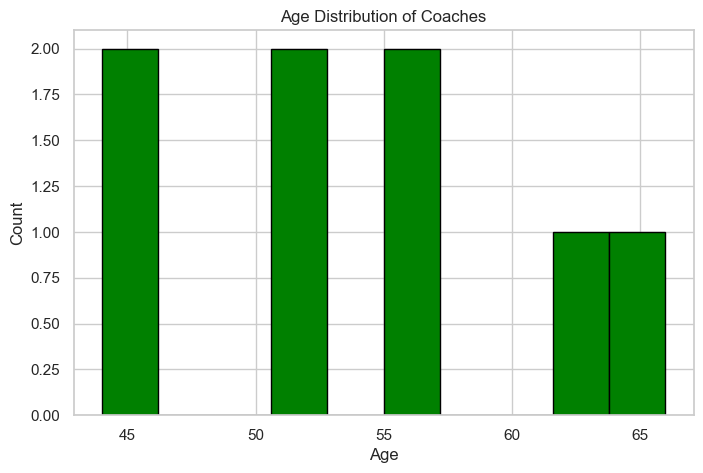

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=10, color='green', edgecolor='black')
plt.title("Age Distribution of Coaches")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Insights:
#### 1. Most coaches are in mid-age range (~30-50 years).
#### 2. Few very young or older coaches exist.

### Top 10 nationalities

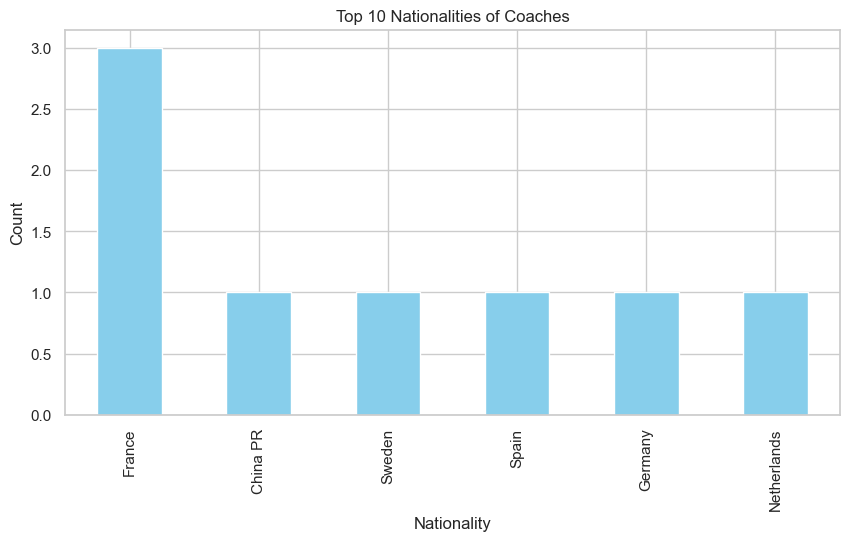

In [12]:
plt.figure(figsize=(10,5))
top_nationalities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Nationalities of Coaches")
plt.ylabel("Count")
plt.xlabel("Nationality")
plt.show()

### Insights:
#### 1. Nationality distribution shows countries with most coaches.
#### 2. Useful to understand representation globally.

### 8. Visualization with Seaborn
#### Age distribution with KDE

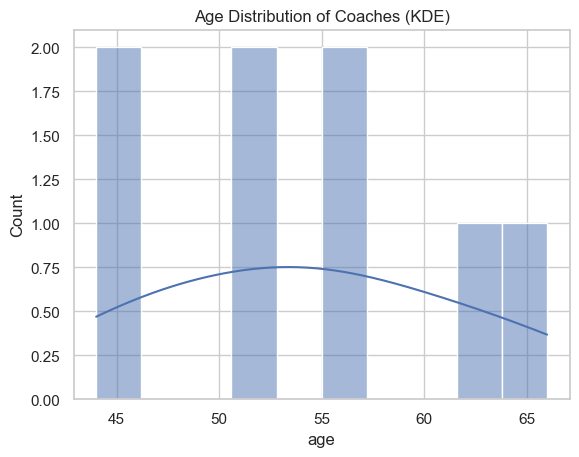

In [13]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution of Coaches (KDE)")
plt.show()

### Insights:
#### 1. Smooth distribution confirms most coaches are middle-aged.
#### 2. KDE helps see age density.

### Countplot of nationalities

C:\Users\Divya\AppData\Local\Temp\ipykernel_22696\1298877241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nationality_name', data=df, order=df['nationality_name'].value_counts().head(10).index, palette='cool')


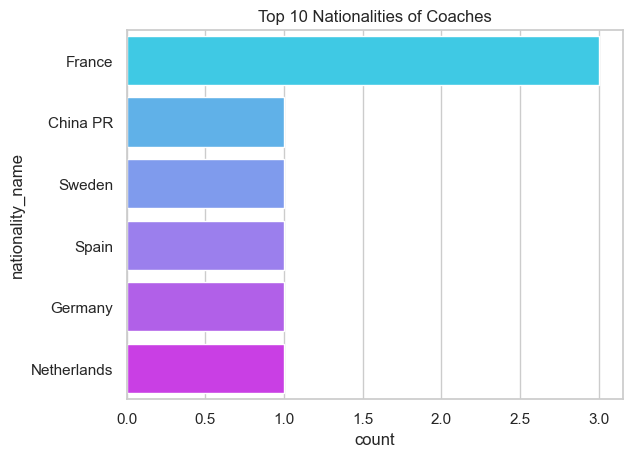

In [14]:
sns.countplot(y='nationality_name', data=df, order=df['nationality_name'].value_counts().head(10).index, palette='cool')
plt.title("Top 10 Nationalities of Coaches")
plt.show()

### Insights:
#### 1. Horizontal countplot clearly shows nationality representation.
#### 2. Useful for comparing countries visually.

### Correlation heatmap of numeric features

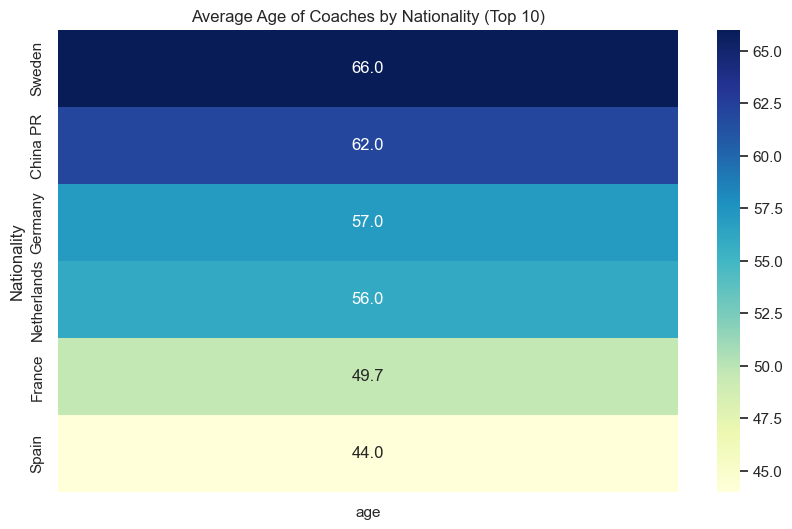

In [19]:
# Heatmap of average age by nationality (top 10 nationalities)
top_nationalities_list = df['nationality_name'].value_counts().head(10).index
age_by_nationality = df[df['nationality_name'].isin(top_nationalities_list)].groupby('nationality_name')['age'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(age_by_nationality.to_frame(), annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Age of Coaches by Nationality (Top 10)")
plt.ylabel("Nationality")
plt.show()

### Insights:
#### 1. Shows which nationalities have older or younger coaches on average.
#### 2. Useful for demographic comparison among countries.